In [1]:
import scipy.stats as sps
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

# Домашнее задание

### Часть 1

Реализуйте функции осуществляющие подсчет основных статистик. На вход подается массив значений, необходимо вернуть среднее, дисперсию и медиану. Использовать np.mean, np.var, np.std, np.median и их аналоги запрещено!

In [49]:
def my_mean(arr):
    mean_value = data.sum()/len(data)# среднее будет равно сумме всех элементов списка / на его длину
    return mean_value

In [50]:
data = normal.rvs(100)
assert np.allclose(np.mean(data), my_mean(data)), "Wrong answer!"

In [51]:
def my_var(arr):
    sum_deviation=0 #задаем счетчик для накомрления суммы равным нулю
    for i in data: #для каждого элемента в списке находим
        degree = (i-my_mean(data))**2 #сначала квадрат разности между средним и текущим значением
        sum_deviation+=degree #накапливаем сумму квадрата разности
    var_value = sum_deviation/len(data) #делим полученную сумму на количество элементов списка
    return var_value

In [52]:
data = normal.rvs(100)
assert np.allclose(np.var(data), my_var(data)), "Wrong answer!"

In [81]:
# Медиана для выборки нечетного размера возвращает элемент, который стоит в центре отсортированной выборки, 
# для четного размера - среднее из двух центральных
def my_median(arr):
    sort_list = data.sort()#сортируем выборку
    if len(data)%2==0:# проверяем четность выборки
        index = int(len(data)/2-1) #считаем индекс - переводим в целое число
        median_value = (data[index+1]+data[index])/2 # для четного размера - среднее из двух центральных 
    else:
        median_value = (len(data)-1)/2 # для нечетного размера - элемент стоящий в центре
    return median_value

In [82]:
data = normal.rvs(100)
assert np.allclose(np.median(data), my_median(data)), "Wrong answer!"

### Часть 2

Закон Больших Чисел звучит следующим образом: 

При соблюдении некоторых условий (которые почти всегда выполняются на практике) среднее набора независимых случайных величин $X_1, X_2, ..., X_n$ сходится к значению $\mathbb{E}X$, если оно существует

Распределение Коши - пример распределения, для которого не существует математического ожидания (среднее может равняться чему угодно)

Предлагается эмпирически проверить корректность этого закона, а также посмотреть как ведет себя среднее для распределения Коши

Для этого:

1) Выберите любое понравившееся распределение (можно не из этого ноутбука)

2) Cгенерируйте выборку размера n=1000

3) Посчитайте среднее первых k=1, 2, 3, ..., n элементов. Сохраните значения в отдельный массив

4) Постройте график зависимости среднего от числа использованных объектов

5) Сделайте какой-нибудь вывод

6) Повторите пункты 2-5 с распределением Коши (sps.cauchy)

7) Дайте оценку полученным результатам

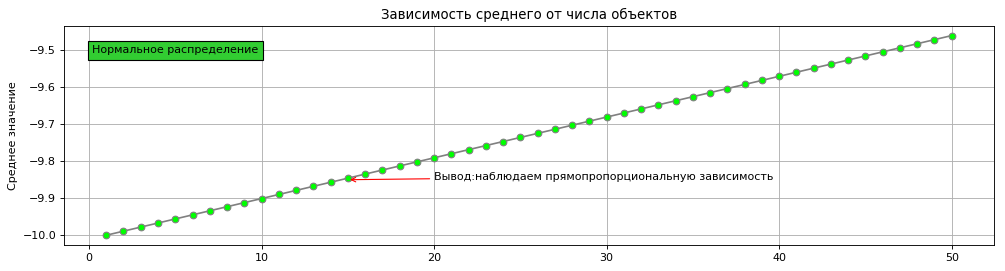

No handles with labels found to put in legend.


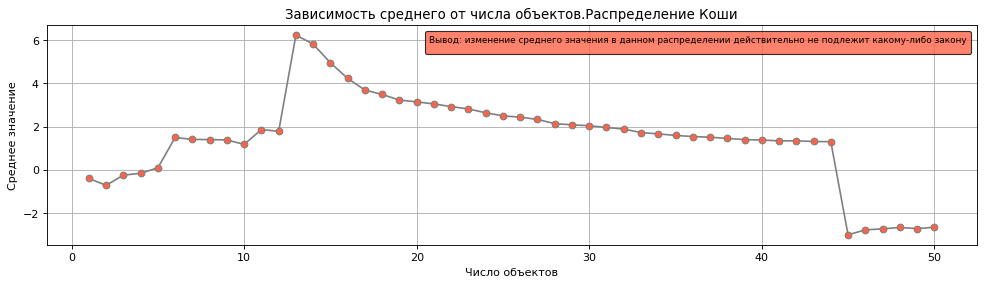

In [302]:
my_list = np.linspace(-10, 12, num=1000)#нормальное распределение, выборка 1000 элементов от -10 до 12
new_list = my_list[0:50]#берем перевые 50 элементов, для них будем считать среднее
s=0 #заводим переменную для подчета суммы
new_arr = []#создаем пустой массив для накопления средних значений
n_list = []# создаем пустой массив для накопления количества элементов
n=1
for i in new_list:
    s+=i # увеличиваем значение суммы на элемент
    medium = s/n #считаем среднее
    new_arr.append(medium) # добавляем значение в список
    n_list.append(n) # добавляем значение в список
    n+=1
# строим график

plt.figure(figsize=(15, 8), dpi= 80)
plt.subplot(2, 1, 1)
plt.plot(n_list,new_arr,color='grey',marker='o',markerfacecolor='lime')
plt.title("Зависимость среднего от числа объектов")
plt.ylabel('Среднее значение')
plt.text(5, -9.5, 'Нормальное распределение', fontsize=10, 
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='limegreen', alpha=1.0))
plt.grid()
plt.annotate("Вывод:наблюдаем прямопропорциональную зависимость", 
             xy=(15,-9.85), xytext=(20,-9.85),fontsize=10, arrowprops = dict(arrowstyle = '->',color = 'red'))
plt.show()


#Теперь повторим данную процедуру для распределения Коши

cauchy = sps.cauchy().rvs(size=1000)# распределение Коши, выборка 1000 элементов от -10 до 12
cauchy_new_list = cauchy[0:50]#берем перевые 50 элементов, для них будем считать среднее
s=0 #заводим переменную для подчета суммы
cauchy_new_arr = []#создаем пустой массив для накопления средних значений
cauchy_n_list = []# создаем пустой массив для накопления количества элементов
n=1
for i in cauchy_new_list:
    s+=i # увеличиваем значение суммы на элемент
    medium = s/n #считаем среднее
    cauchy_new_arr.append(medium) # добавляем значение в список
    cauchy_n_list.append(n) # добавляем значение в список
    n+=1
# строим график   
plt.figure(figsize=(15, 8), dpi= 80)
plt.subplot(2, 1, 2)
plt.plot(cauchy_n_list,cauchy_new_arr,color='grey',marker='o',markerfacecolor='tomato')
plt.legend(facecolor = 'tomato',    #  цвет области
          edgecolor = 'black',    #  цвет крайней линии
          title = 'Вывод: изменение среднего значения в данном распределении действительно не подлежит какому-либо закону',    #  заголовок
          title_fontsize = '8'    )
plt.title("Зависимость среднего от числа объектов.Распределение Коши")
plt.xlabel("Число объектов")
plt.ylabel('Среднее значение')


plt.grid()
plt.show()

#Выводы обозначены на графиках ниже

### Часть 3*

Центральная Предельная Теорема звучит следующим образом: 

При достаточно больших n распределение среднего по выборке независимых одинаково распределенных величин будет иметь нормальное распределение. 

Формально: $\sqrt{n}\frac{\overline{X} - \mu}{\sigma} \rightarrow \mathcal{N}(0, 1)$, если среднее $\mu$ и  стандартное отклонение $\sigma$ существуют

Проверьте эмпирически ЦПТ

Для этого: 

1) Сгенерируйте 1000 выборок по 1000 элементов из произвольного (желательно не нормального)

2) По каждой выборке посчитайте среднее и вычислите левую часть выражения, указанного выше (параметры $\mu$ и $\sigma$ возьмите из соответствующей функции scipy.stats (sps))

3) Сравните распределение этих величин (у вас должно получиться 1000 значений) со стандартным нормальным распределением

4) Сделайте выводы

No handles with labels found to put in legend.


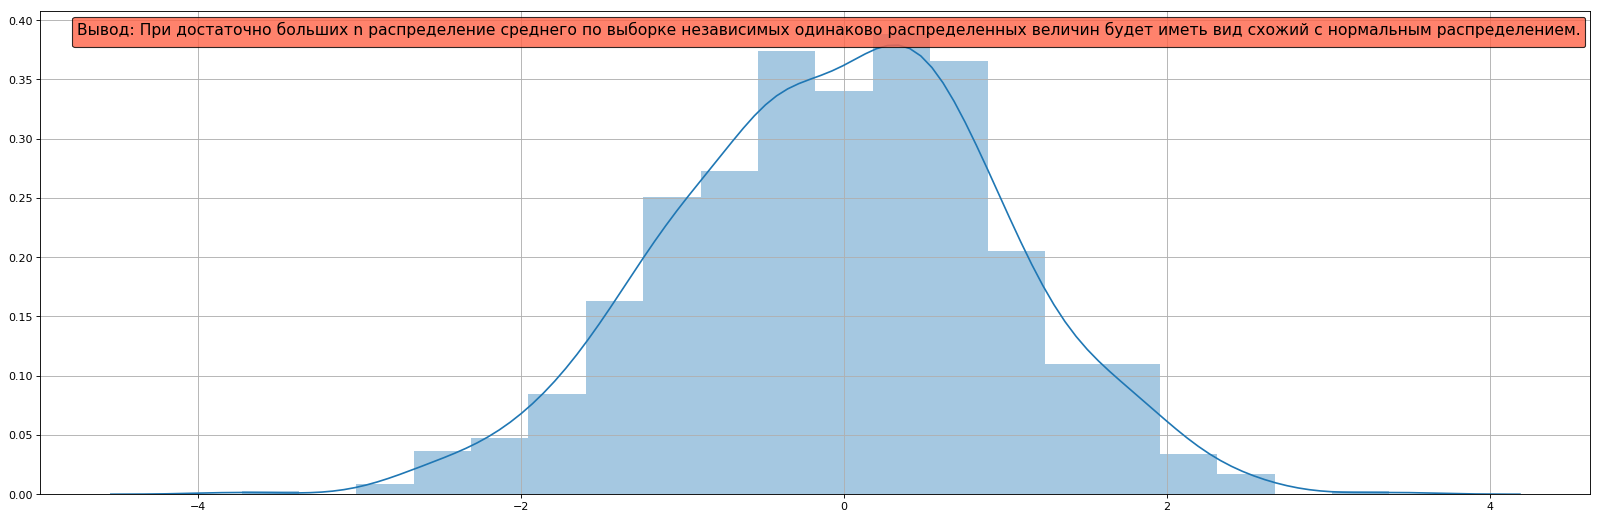

In [8]:
import scipy.stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
    
n=1000
arr_left_side_formulas = [] #пустой список для накопления вычислений по левой стороне формулы

for i in range(1000): #повторяем 1000 раз
    list_1 = sps.bernoulli(p=0.3).rvs(size=1000) #список с 1000 значений
    af = list_1.mean() #находим среднее из полученного массива
    sigma = list_1.std() #находим ср.кв. отклонение
    miu = 0.3 
    left_side_formulas = (n**0.5)*(af-miu)/sigma #вычисляем левую часть выражения
    arr_left_side_formulas.append(left_side_formulas) #добавляем в изначально пустой список значение     
    
#строим график
plt.figure(figsize=(25, 8), dpi= 80)
sns.distplot(arr_left_side_formulas,bins=20)
plt.legend(facecolor = 'tomato',    #  цвет области
          edgecolor = 'black',    #  цвет крайней линии
          title = 'Вывод: При достаточно больших n распределение среднего по выборке\
 независимых одинаково распределенных величин будет иметь вид схожий с нормальным распределением.',
          title_fontsize = '14')
plt.grid()
plt.show()    